In [2]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [4]:
os.chdir(r'G:\공유 드라이브\SicParvisMagna\데이터\코로나_매출')
df_region = pd.read_excel('대구구별_확진자수_21-01-02~21-07-20.xlsx')
df_region.index = df_region.iloc[:, 0]
del df_region['Unnamed: 0']
df_region

,수성,달서,북,서,중,남,달성,동
Unnamed: 0,,,,,,,,
2021-01-02,13,5,4,5,0,2,2,2
2021-01-03,7,6,1,6,1,2,1,2
2021-01-04,12,5,3,0,1,1,0,7
2021-01-05,21,3,1,0,0,0,1,5
2021-01-06,10,4,1,4,1,1,0,2
...,...,...,...,...,...,...,...,...
2021-07-16,13,5,3,2,1,1,1,4
2021-07-17,3,6,2,4,4,3,2,4
2021-07-18,11,12,10,2,2,1,1,2


In [6]:
df_sales = pd.read_excel('일별매출_2021-01-02~2021-07-20.xlsx')
df_sales.index = df_sales.iloc[:, 0]
del df_sales['Unnamed: 0']
df_sales

,남김천휴게소(무보까국밥),무보까국밥(구평점),무보까국밥(상인점),무보까국밥(서구점),무보까국밥(서문점),무보까국밥(석적점),무보까국밥(성서점),무보까국밥(신평점),무보까국밥(안동점),무보까국밥(엑스코점),무보까국밥(옥계점),무보까국밥(용산점),무보까국밥(원대점),무보까국밥(장기점),무보까국밥(평리점),무보까국밥(황상점),무보까국밥과보쌈(신서점)
Unnamed: 0,,,,,,,,,,,,,,,,,
2021-01-02,0,697000,860000,517500,140000,1649000,2234500,546500,614000,52500,1389500,862500,244000,625000,895000,468000,1173000
2021-01-03,0,684500,874500,1039500,67500,1581000,2287000,335500,0,151500,1256500,912000,133500,842000,952500,555500,1503000
2021-01-04,93000,581500,712500,736000,277500,1623500,1715500,0,1160000,266000,976000,473500,284000,501500,940500,637000,1247000
2021-01-05,100000,809000,900500,618500,309500,1349500,1840000,808000,673500,174500,858000,745000,346500,710500,446000,380000,1047000
2021-01-06,30000,1025500,787000,383000,135000,1316500,1612000,0,755000,111000,1197500,456000,89000,652500,835500,375000,1351000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-16,38500,1286500,922500,417000,122000,2340000,1647000,541500,498500,361000,2198000,501000,244500,850500,0,524500,1045000
2021-07-17,37500,1431000,1174000,417500,80000,3173500,3041500,447500,0,688000,2830000,481500,276000,1065000,0,562000,1396000
2021-07-18,0,1355000,1432500,799000,154500,1702000,3012000,759000,0,343500,1686500,801000,217500,1080500,0,836500,1550000


In [7]:
df_var = pd.DataFrame()
df_var['달서구_확진자_수'] = df_region['달서']
df_var['상인점'] = df_sales['무보까국밥(상인점)']
df_var['성서점'] = df_sales['무보까국밥(성서점)']
df_var['장기점'] = df_sales['무보까국밥(장기점)']
df_var

,달서구_확진자_수,상인점,성서점,장기점
Unnamed: 0,,,,
2021-01-02,5,860000,2234500,625000
2021-01-03,6,874500,2287000,842000
2021-01-04,5,712500,1715500,501500
2021-01-05,3,900500,1840000,710500
2021-01-06,4,787000,1612000,652500
...,...,...,...,...
2021-07-16,5,922500,1647000,850500
2021-07-17,6,1174000,3041500,1065000
2021-07-18,12,1432500,3012000,1080500


In [8]:
df_var_log = np.log(df_var)
df_var_log

,달서구_확진자_수,상인점,성서점,장기점
Unnamed: 0,,,,
2021-01-02,1.609438,13.664688,14.619528,13.345507
2021-01-03,1.791759,13.681408,14.642751,13.643535
2021-01-04,1.609438,13.476535,14.355215,13.125359
2021-01-05,1.098612,13.710705,14.425276,13.473724
2021-01-06,1.386294,13.575984,14.292986,13.388566
...,...,...,...,...
2021-07-16,1.609438,13.734843,14.314466,13.653580
2021-07-17,1.791759,13.975927,14.927861,13.878485
2021-07-18,2.484907,14.174932,14.918115,13.892934


In [9]:
df_var_diff = df_var.diff().dropna()
df_var_diff

,달서구_확진자_수,상인점,성서점,장기점
Unnamed: 0,,,,
2021-01-03,1.0,14500.0,52500.0,217000.0
2021-01-04,-1.0,-162000.0,-571500.0,-340500.0
2021-01-05,-2.0,188000.0,124500.0,209000.0
2021-01-06,1.0,-113500.0,-228000.0,-58000.0
2021-01-07,-2.0,-85000.0,611500.0,178500.0
...,...,...,...,...
2021-07-16,-8.0,180500.0,-275000.0,145000.0
2021-07-17,1.0,251500.0,1394500.0,214500.0
2021-07-18,6.0,258500.0,-29500.0,15500.0


In [10]:
df_var_logdiff = np.log(df_var).diff().dropna()
# df_var_logdiff = df_var_logdiff.replace(np.inf, 0)
# df_var_logdiff = df_var_logdiff.replace(-np.inf, 0)
df_var_logdiff

,달서구_확진자_수,상인점,성서점,장기점
Unnamed: 0,,,,
2021-01-03,0.182322,0.016720,0.023223,0.298028
2021-01-04,-0.182322,-0.204872,-0.287536,-0.518176
2021-01-05,-0.510826,0.234170,0.070061,0.348365
2021-01-06,0.287682,-0.134722,-0.132290,-0.085158
2021-01-07,-0.693147,-0.114295,0.321607,0.241819
...,...,...,...,...
2021-07-16,-0.955511,0.217738,-0.154411,0.186918
2021-07-17,0.182322,0.241085,0.613395,0.224906
2021-07-18,0.693147,0.199004,-0.009747,0.014449


In [179]:
df_var_temp = pd.DataFrame()
df_var_temp['달서구_확진자_수'] = df_var['달서구_확진자_수']
df_var_temp['장기점'] = df_var['장기점']
#df_var_temp['성서점'] = np.log(df_var_temp['성서점'])
df_var_temp

,달서구_확진자_수,장기점
Unnamed: 0,,
2021-01-02,5,625000
2021-01-03,6,842000
2021-01-04,5,501500
2021-01-05,3,710500
2021-01-06,4,652500
...,...,...
2021-07-16,5,850500
2021-07-17,6,1065000
2021-07-18,12,1080500


In [104]:
df_var_temp_train = df_var_temp[:197] # 80%
df_var_temp_test = df_var_temp[197:]
df_var_temp_train

,달서구_확진자_수,상인점
Unnamed: 0,,
2021-01-02,5,13.664688
2021-01-03,6,13.681408
2021-01-04,5,13.476535
2021-01-05,3,13.710705
2021-01-06,4,13.575984
...,...,...
2021-07-13,7,14.108180
2021-07-14,10,13.669328
2021-07-15,13,13.517105


In [128]:
model = VAR(df_var_temp)
results_all = model.fit(maxlags = 65, ic = 'aic')
# results_all = model.fit(maxlags = 8, ic = 'aic')
results_all.summary()

C:\Users\alswo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 22, Jul, 2021
Time:                     14:57:06
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    29.0351
Nobs:                     135.000    HQIC:                   25.6880
Log likelihood:          -1700.39    FPE:                1.32127e+12
AIC:                      23.3967    Det(Omega_mle):     3.40327e+11
--------------------------------------------------------------------
Results for equation 달서구_확진자_수
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const               -21.086626        25.892194           -0.814           0.415
L1.달서구_확진자_수          0.507827         0.362452            1.401           0.161
L1.장기점                0.000005         0.000002         

In [106]:
var_forc = results_all.forecast(df_var_temp_train.values[-results_all.k_ar : ], 3)
var_forc


array([[38.4068657 , 13.02182111],
       [35.87555803, 13.8458278 ],
       [82.20140202, 12.05804893]])

In [109]:
df_var_temp_train_forc = pd.DataFrame(var_forc)
df_var_temp_train_forc.columns = ['달서구_확진자_수', '상인점']
df_var_temp_train_forc['상인점'] = np.exp(df_var_temp_train_forc['상인점'])
# df_var_temp_train_forc['성서점'] = np.exp(df_var_temp_train_forc['성서점'])
# df_var_temp_train_forc['장기점'] = np.exp(df_var_temp_train_forc['장기점'])
df_var_temp_train_forc

# df_forc_120 = pd.DataFrame(np_forc_120)
# df_forc_120.columns = ['상인', 'KOSPI', '금리']
# df_forc_120

,달서구_확진자_수,상인점
0,38.406866,4.521734e+05
1,35.875558,1.030781e+06
2,82.201402,1.724821e+05


In [108]:
df_var_temp_test['상인점'] = np.exp(df_var_temp_test['상인점'])
df_var_temp_test

C:\Users\alswo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,달서구_확진자_수,상인점
Unnamed: 0,,
2021-07-18,12,1432500.0
2021-07-19,4,783000.0
2021-07-20,7,804500.0


In [129]:
from sklearn.preprocessing import StandardScaler


In [136]:
scaler = StandardScaler()
print(scaler.fit(df_var))
print(scaler.mean_)
print(scaler.transform(df_var))


StandardScaler()
[3.5800000e+00 1.2706875e+06 2.5100525e+06 1.0211475e+06]
[[ 3.85000610e-01 -9.10343880e-01 -3.64455480e-01 -1.08770489e+00]
 [ 6.56127800e-01 -8.78202687e-01 -2.95017124e-01 -4.91886512e-01]
 [ 3.85000610e-01 -1.23729740e+00 -1.05090323e+00 -1.42679968e+00]
 [-1.57253770e-01 -8.20570203e-01 -8.86235130e-01 -8.52946958e-01]
 [ 1.13873420e-01 -1.07215816e+00 -1.18779599e+00 -1.01219795e+00]
 [-4.28380960e-01 -1.26057205e+00 -3.79004469e-01 -5.22089287e-01]
 [-4.28380960e-01 -1.40243663e+00 -7.92989337e-01 -7.45864392e-01]
 [ 3.85000610e-01 -1.49221031e+00  4.42352090e-01 -5.86613397e-01]
 [ 2.28289094e+00 -3.42885574e-01  5.08483858e-01 -1.59703351e+00]
 [-6.99508151e-01 -1.18742313e+00 -1.02180525e+00 -3.29889810e-01]
 [ 1.46950937e+00 -1.11316589e+00 -5.60205513e-01 -9.95723713e-01]
 [ 9.27254990e-01 -1.19407303e+00 -9.94029912e-01 -4.78157978e-01]
 [-4.28380960e-01 -6.35481263e-01 -7.69843218e-01 -5.12479313e-01]
 [ 1.13873420e-01 -1.23729740e+00 -1.30352659e+00 -1.3

In [138]:
df_var_scaled = pd.DataFrame(scaler.transform(df_var))
df_var_scaled.columns = ['달서구_확진자_수', '상인점', '성서점', '장기점']
df_var_scaled

,달서구_확진자_수,상인점,성서점,장기점
0,0.385001,-0.910344,-0.364455,-1.087705
1,0.656128,-0.878203,-0.295017,-0.491887
2,0.385001,-1.237297,-1.050903,-1.426800
3,-0.157254,-0.820570,-0.886235,-0.852947
4,0.113873,-1.072158,-1.187796,-1.012198
...,...,...,...,...
195,0.385001,-0.771804,-1.141504,-0.468548
196,0.656128,-0.214321,0.702911,0.120406
197,2.282891,0.358679,0.663894,0.162965
198,0.113873,-1.081025,-0.862428,-1.134382


In [202]:
df_var_scaled_temp = pd.DataFrame()
df_var_scaled_temp['달서구_확진자_수'] = df_var_scaled['달서구_확진자_수']
df_var_scaled_temp['장기점'] = df_var_scaled['장기점']
df_var_scaled_temp

,달서구_확진자_수,장기점
0,0.385001,-1.087705
1,0.656128,-0.491887
2,0.385001,-1.426800
3,-0.157254,-0.852947
4,0.113873,-1.012198
...,...,...
195,0.385001,-0.468548
196,0.656128,0.120406
197,2.282891,0.162965
198,0.113873,-1.134382


In [155]:
df_var_scaled_temp_diff = df_var_scaled_temp.diff().dropna()
df_var_scaled_temp_diff

,달서구_확진자_수,장기점
1,0.271127,0.595818
2,-0.271127,-0.934913
3,-0.542254,0.573853
4,0.271127,-0.159251
5,-0.542254,0.490109
...,...,...
195,-2.169018,0.398127
196,0.271127,0.588954
197,1.626763,0.042558
198,-2.169018,-1.297346


In [144]:
df_var_scaled_temp_logdiff = np.log(df_var_scaled_temp).diff().dropna()
df_var_scaled_temp_logdiff

,달서구_확진자_수,상인점
83,0.000000,-0.989829
84,2.557596,1.686431
93,-0.806328,-0.085141
94,0.000000,-2.083771
140,0.203956,0.122804
141,1.276208,-0.120764
191,2.557596,-2.688176
192,-0.460455,0.425042


In [157]:
model = VAR(df_var_scaled_temp_diff)
results_all = model.fit(maxlags = 65, ic = 'aic')
results_all.summary()

C:\Users\alswo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 22, Jul, 2021
Time:                     15:26:41
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.690309
Nobs:                     134.000    HQIC:                  -2.67317
Log likelihood:           215.091    FPE:                    1.07915
AIC:                     -4.97562    Det(Omega_mle):        0.275930
--------------------------------------------------------------------
Results for equation 달서구_확진자_수
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.597060         0.536628            1.113           0.266
L1.달서구_확진자_수         -0.353239         0.550193           -0.642           0.521
L1.장기점                0.388247         0.362082         

In [177]:
df_var_temp['6일뒤'] = df_var_temp['장기점'].shift(6).dropna()
df_var_temp = df_var_temp.dropna()
del df_var_temp['달서구_확진자_수']
df_var_temp

C:\Users\alswo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,장기점,6일뒤
Unnamed: 0,,
2021-01-14,834500,749500.0
2021-01-15,971000,807500.0
2021-01-16,704500,439500.0
2021-01-17,1106000,901000.0
2021-01-18,542500,658500.0
...,...,...
2021-07-16,850500,1041000.0
2021-07-17,1065000,671000.0
2021-07-18,1080500,1025500.0


In [165]:
import matplotlib.pyplot as plt


In [205]:
#df_var_scaled_temp['6일뒤'] = df_var_scaled_temp['장기점'].shift(6)
df_var_scaled_temp['3일뒤'] = df_var_scaled_temp['장기점'].shift(3)
df_var_scaled_temp = df_var_scaled_temp.dropna()
df_var_scaled_temp

,달서구_확진자_수,장기점,3일뒤
3,-0.157254,-0.852947,-1.087705
4,0.113873,-1.012198,-0.491887
5,-0.428381,-0.522089,-1.426800
6,-0.428381,-0.745864,-0.852947
7,0.385001,-0.586613,-1.012198
...,...,...,...
195,0.385001,-0.468548,-0.909234
196,0.656128,0.120406,0.260437
197,2.282891,0.162965,-0.866675
198,0.113873,-1.134382,-0.468548


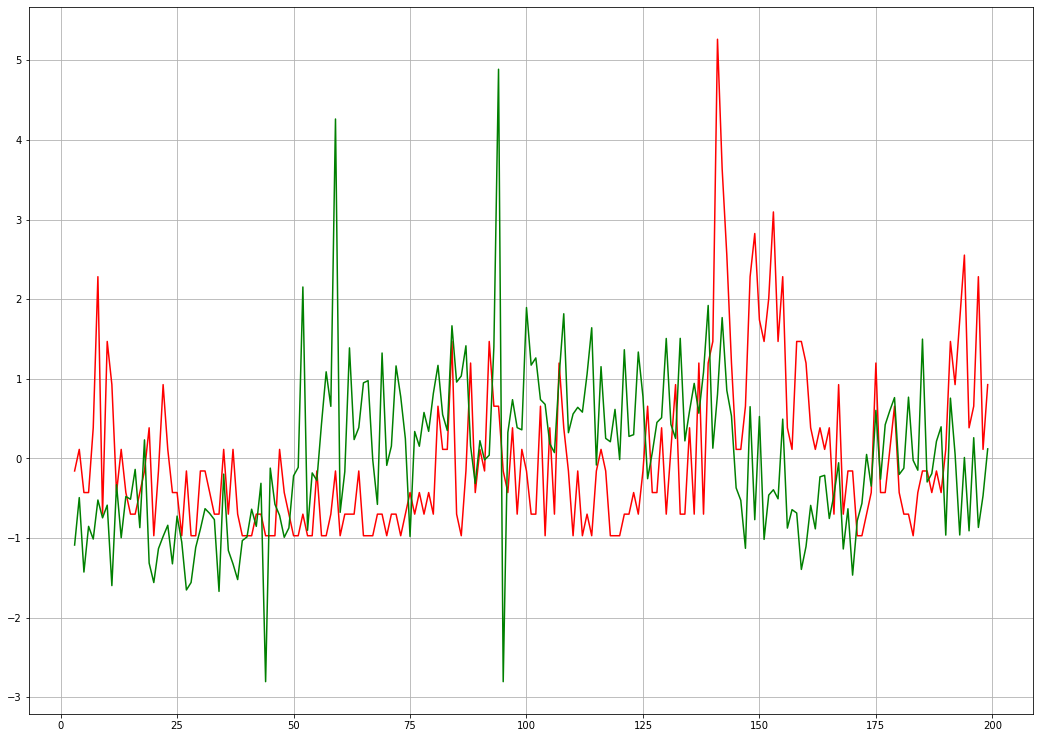

In [206]:
plt.figure(figsize=(18,13))
plt.plot(df_var_scaled_temp['달서구_확진자_수'], 'r-', df_var_scaled_temp['3일뒤'], 'g-')
plt.grid(True)
plt.show()

In [207]:
df_var_scaled_temp.diff().dropna()

,달서구_확진자_수,장기점,3일뒤
4,0.271127,-0.159251,0.595818
5,-0.542254,0.490109,-0.934913
6,0.000000,-0.223775,0.573853
7,0.813382,0.159251,-0.159251
8,1.897890,-1.010420,0.490109
...,...,...,...
195,-2.169018,0.398127,-0.921185
196,0.271127,0.588954,1.169671
197,1.626763,0.042558,-1.127113
198,-2.169018,-1.297346,0.398127


In [211]:
df_var_scaled_temp.to_csv('달서구_장기점_3일뒤.csv', encoding = 'cp949')

In [209]:
df_var_scaled_temp.diff().dropna().to_csv('달서구_장기점_3일뒤_diff_3.csv', encoding = 'cp949')